<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#What-Are-Time-Series-Data?" data-toc-modified-id="What-Are-Time-Series-Data?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What Are Time Series Data?</a></span><ul class="toc-item"><li><span><a href="#Some-Examples" data-toc-modified-id="Some-Examples-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Some Examples</a></span></li><li><span><a href="#Uses-for-Time-Series" data-toc-modified-id="Uses-for-Time-Series-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Uses for Time Series</a></span></li><li><span><a href="#Example-Data" data-toc-modified-id="Example-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Example Data</a></span></li></ul></li><li><span><a href="#Datetime-Objects" data-toc-modified-id="Datetime-Objects-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Datetime Objects</a></span><ul class="toc-item"><li><span><a href="#Setting-Datetime-Objects-as-the-Index" data-toc-modified-id="Setting-Datetime-Objects-as-the-Index-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Setting Datetime Objects as the Index</a></span></li><li><span><a href="#Investigating-Time-Series-with-Datetime-Objects" data-toc-modified-id="Investigating-Time-Series-with-Datetime-Objects-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Investigating Time Series with Datetime Objects</a></span></li></ul></li><li><span><a href="#Resampling-Techniques" data-toc-modified-id="Resampling-Techniques-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Resampling Techniques</a></span><ul class="toc-item"><li><span><a href="#Aside:-Deeper-Exploration" data-toc-modified-id="Aside:-Deeper-Exploration-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Aside: Deeper Exploration</a></span></li></ul></li><li><span><a href="#Visualizing-Time-Series" data-toc-modified-id="Visualizing-Time-Series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizing Time Series</a></span><ul class="toc-item"><li><span><a href="#Showing-Changes-Over-Time" data-toc-modified-id="Showing-Changes-Over-Time-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Showing Changes Over Time</a></span><ul class="toc-item"><li><span><a href="#Line-Plot" data-toc-modified-id="Line-Plot-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Line Plot</a></span></li><li><span><a href="#Dot-Plot" data-toc-modified-id="Dot-Plot-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Dot Plot</a></span></li><li><span><a href="#Grouping-Plots" data-toc-modified-id="Grouping-Plots-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Grouping Plots</a></span><ul class="toc-item"><li><span><a href="#All-Annual-Separated" data-toc-modified-id="All-Annual-Separated-5.1.3.1"><span class="toc-item-num">5.1.3.1&nbsp;&nbsp;</span>All Annual Separated</a></span></li><li><span><a href="#All-Annual-Together" data-toc-modified-id="All-Annual-Together-5.1.3.2"><span class="toc-item-num">5.1.3.2&nbsp;&nbsp;</span>All Annual Together</a></span></li></ul></li></ul></li><li><span><a href="#Showing-Distributions" data-toc-modified-id="Showing-Distributions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Showing Distributions</a></span><ul class="toc-item"><li><span><a href="#Histogram" data-toc-modified-id="Histogram-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="#Density" data-toc-modified-id="Density-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Density</a></span></li><li><span><a href="#Box-Plot" data-toc-modified-id="Box-Plot-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Box Plot</a></span></li><li><span><a href="#Heat-Maps" data-toc-modified-id="Heat-Maps-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Heat Maps</a></span><ul class="toc-item"><li><span><a href="#Example-of-how-heat-maps-are-useful" data-toc-modified-id="Example-of-how-heat-maps-are-useful-5.2.4.1"><span class="toc-item-num">5.2.4.1&nbsp;&nbsp;</span>Example of how heat maps are useful</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#EXTRAS" data-toc-modified-id="EXTRAS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EXTRAS</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>EDA</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

#  Objectives

- Understand the use case for time series data
- Manipulate datetime objects
- Understand different resampling techniques
- Implement different visualization techniques for time series data

# What Are Time Series Data?

> We can saw data is a **time series** when the temporal information is a key focus of the data.

Data in a time series can stem from historical data or data that is dependent on past values.

## Some Examples

- Stock prices
- Atmospheric changes over the course of decades
- Audio samples
- Heart rate data

## Uses for Time Series

- Understand some underlying process
- Forecasting (what we'll mostly focus on)
- Imputation (filling missing "past" data)
- Anomaly detection

## Example Data

In [2]:
# Define a function that will help us load and
# clean up a dataset.

def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['counts']
    df['counts'] = df['counts'].str.replace('<1', '0').astype(int)
    return df

In [3]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})
df.head()

,counts
2004-01,17
2004-02,5
2004-03,11
2004-04,10
2004-05,8


Now we can do this with multiple time series data!

In [4]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'coronavirus', 'country_code': 'us'},
    {'trend_name': 'trump', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},
    {'trend_name': 'avengers', 'country_code': 'us'}
]

In [5]:
trend_dfs = [load_trend(**trend) for trend in trends]

# Datetime Objects

Datetime objects make our time series modeling lives easier.  They will allow us to perform essential data prep tasks with a few lines of code.  

We need our time series **index** to be datetime objects, since our models will rely on being able to identify the previous chronological value.

There is a `datetime` [library](https://docs.python.org/2/library/datetime.html), and inside `pandas` there is a datetime module as well as a to_datetime() function.

For time series modeling, the first step often is to make sure that the index is a datetime object.

## Setting Datetime Objects as the Index

There are a few ways to **reindex** our series to datetime. 

We can use `pandas.to_datetime()` method:

In [6]:
ts_no_datetime = pd.read_csv('data/Gun_Crimes_Heat_Map.csv')

In [7]:
ts_no_datetime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,9446834,HX100098,01/01/2014 12:02:00 AM,072XX S MORGAN ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENTIAL YARD (FRONT/BACK),True,False,...,17.0,68,15,1170897.0,1856795.0,2014,02/10/2018 03:50:01 PM,41.762519,-87.649198,"(41.762519013, -87.64919809)"
1,9446765,HX100013,01/01/2014 12:03:00 AM,064XX S ROCKWELL ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),True,False,...,15.0,66,15,1160145.0,1861909.0,2014,02/10/2018 03:50:01 PM,41.776780,-87.688465,"(41.776780469, -87.688465418)"
2,9446921,HX100067,01/01/2014 12:04:00 AM,048XX S PRAIRIE AVE,1460,WEAPONS VIOLATION,POSS FIREARM/AMMO:NO FOID CARD,APARTMENT,True,False,...,3.0,38,15,1178859.0,1872997.0,2014,02/04/2016 06:33:39 AM,41.806801,-87.619523,"(41.806801421, -87.61952336)"
3,9446783,HX100093,01/01/2014 12:05:00 AM,011XX W 50TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,PARKING LOT/GARAGE(NON.RESID.),True,False,...,16.0,61,15,1169689.0,1871646.0,2014,02/10/2018 03:50:01 PM,41.803298,-87.653195,"(41.8032982, -87.653195042)"
4,9446811,HX100017,01/01/2014 12:05:00 AM,031XX W WALNUT ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE PORCH/HALLWAY,True,False,...,27.0,27,15,1155344.0,1901461.0,2014,02/10/2018 03:50:01 PM,41.885414,-87.705005,"(41.885413516, -87.705005317)"


In [8]:
ts_no_datetime.index

RangeIndex(start=0, stop=97437, step=1)

In [9]:
ts = ts_no_datetime.set_index(pd.to_datetime(ts_no_datetime['Date']), drop=True)

> Alternatively, we can parse the dates directly on import

In [10]:
ts = pd.read_csv('data/Gun_Crimes_Heat_Map.csv', index_col='Date', parse_dates=True)

In [11]:
print(f"Now our index is a {type(ts.index)}")

Now our index is a <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [12]:
ts.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:02:00,9446834,HX100098,072XX S MORGAN ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENTIAL YARD (FRONT/BACK),True,False,733,...,17.0,68,15,1170897.0,1856795.0,2014,02/10/2018 03:50:01 PM,41.762519,-87.649198,"(41.762519013, -87.64919809)"
2014-01-01 00:03:00,9446765,HX100013,064XX S ROCKWELL ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),True,False,825,...,15.0,66,15,1160145.0,1861909.0,2014,02/10/2018 03:50:01 PM,41.776780,-87.688465,"(41.776780469, -87.688465418)"
2014-01-01 00:04:00,9446921,HX100067,048XX S PRAIRIE AVE,1460,WEAPONS VIOLATION,POSS FIREARM/AMMO:NO FOID CARD,APARTMENT,True,False,224,...,3.0,38,15,1178859.0,1872997.0,2014,02/04/2016 06:33:39 AM,41.806801,-87.619523,"(41.806801421, -87.61952336)"
2014-01-01 00:05:00,9446783,HX100093,011XX W 50TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,PARKING LOT/GARAGE(NON.RESID.),True,False,933,...,16.0,61,15,1169689.0,1871646.0,2014,02/10/2018 03:50:01 PM,41.803298,-87.653195,"(41.8032982, -87.653195042)"
2014-01-01 00:05:00,9446811,HX100017,031XX W WALNUT ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE PORCH/HALLWAY,True,False,1222,...,27.0,27,15,1155344.0,1901461.0,2014,02/10/2018 03:50:01 PM,41.885414,-87.705005,"(41.885413516, -87.705005317)"


## Investigating Time Series with Datetime Objects

Datetime objects include aspects of the date as attributes, like month and year:

In [13]:
ts.index[0]

Timestamp('2014-01-01 00:02:00')

In [14]:
ts.index[0].month

1

In [15]:
ts.index[0].year

2014

We can also use the date to directly slice the DataFrame

In [16]:
# Only data after 2021
ts['2021':]

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,12258861,JE100369,016XX N CICERO AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,ALLEY,False,False,2533,...,37.0,25,04A,1144145.0,1910673.0,2021,01/16/2021 03:49:23 PM,41.910910,-87.745899,"(41.910909931, -87.745898897)"
2021-01-01 00:00:00,12259020,JE100698,075XX S JEFFERY BLVD,141B,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,STREET,False,False,414,...,8.0,43,15,1190847.0,1855361.0,2021,01/16/2021 03:49:23 PM,41.758125,-87.576126,"(41.758125331, -87.576125553)"
2021-01-01 00:00:00,12259663,JE101362,040XX S LAKE PARK AVE,141B,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,214,...,4.0,36,15,1183760.0,1878197.0,2021,01/16/2021 03:49:23 PM,41.820957,-87.601386,"(41.820957498, -87.601385842)"
2021-01-01 00:03:00,12258570,JE100122,057XX S MARSHFIELD AVE,143B,WEAPONS VIOLATION,UNLAWFUL POSSESSION - OTHER FIREARM,RESIDENCE - YARD (FRONT / BACK),False,False,715,...,16.0,67,15,1166325.0,1866554.0,2021,01/16/2021 03:49:23 PM,41.789398,-87.665677,"(41.789397529, -87.665677479)"
2021-01-01 00:05:00,12258631,JE100007,064XX N CLAREMONT AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,True,False,2412,...,50.0,2,15,1159480.0,1942629.0,2021,01/16/2021 03:49:23 PM,41.998297,-87.688680,"(41.998296976, -87.688680214)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 21:56:00,12291334,JE139290,015XX E 73RD ST,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,324,...,7.0,43,04B,NaN,NaN,2021,02/18/2021 03:52:19 PM,NaN,NaN,NaN
2021-02-11 21:56:00,12291244,JE139274,059XX W MADISON ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,RESTAURANT,True,False,1513,...,29.0,25,15,NaN,NaN,2021,02/18/2021 03:52:19 PM,NaN,NaN,NaN
2021-02-11 22:16:00,12291306,JE139291,004XX S KEDZIE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1134,...,28.0,27,15,NaN,NaN,2021,02/18/2021 03:52:19 PM,NaN,NaN,NaN


In [17]:
# Only data from this time period
ts['2020-02-01 00:00':'2020-02-01 01:00']

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:09:00,11968268,JD135841,042XX S LA SALLE ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,213,...,3.0,37,15,1176121.0,1876929.0,2020,02/08/2020 03:49:23 PM,41.817653,-87.629447,"(41.817653149, -87.629447264)"
2020-02-01 00:35:00,11968266,JD135848,075XX S MORGAN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,621,...,17.0,71,15,1170949.0,1854878.0,2020,02/08/2020 03:49:23 PM,41.757257,-87.649063,"(41.757257385, -87.649063391)"
2020-02-01 00:44:00,11979865,JD135845,005XX W 95TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,RESIDENCE,False,True,2223,...,21.0,73,04A,1174193.0,1841887.0,2020,02/19/2020 03:49:58 PM,41.721537,-87.637560,"(41.721536966, -87.637559575)"
2020-02-01 00:47:00,11968240,JD135837,045XX W JACKSON BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VACANT LOT/LAND,True,False,1113,...,28.0,26,15,1146237.0,1898304.0,2020,02/08/2020 03:49:23 PM,41.876928,-87.738529,"(41.876928448, -87.738528552)"


In [18]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97437 entries, 2014-01-01 00:02:00 to 2021-02-11 23:30:00
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    97437 non-null  int64  
 1   Case Number           97437 non-null  object 
 2   Block                 97437 non-null  object 
 3   IUCR                  97437 non-null  object 
 4   Primary Type          97437 non-null  object 
 5   Description           97437 non-null  object 
 6   Location Description  97435 non-null  object 
 7   Arrest                97437 non-null  bool   
 8   Domestic              97437 non-null  bool   
 9   Beat                  97437 non-null  int64  
 10  District              97437 non-null  int64  
 11  Ward                  97436 non-null  float64
 12  Community Area        97437 non-null  int64  
 13  FBI Code              97437 non-null  object 
 14  X Coordinate          97252 non-nul

We can easily see now whether offenses happen, for example, during business hours.

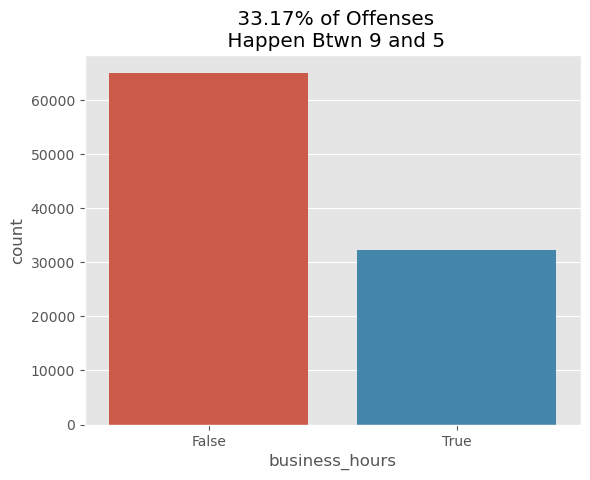

In [19]:
fig, ax = plt.subplots()

ts['hour'] = ts.index
ts['hour'] = ts.hour.apply(lambda x: x.hour)
ts['business_hours'] = ts.hour.apply(lambda x: 9 <= x <= 17)

bh_ratio = ts.business_hours.value_counts()[1]/len(ts)

x = ts.business_hours.value_counts().index
y = ts.business_hours.value_counts()
sns.barplot(x=x, y=y)

ax.set_title(f'{bh_ratio: 0.2%} of Offenses\n Happen Btwn 9 and 5');

# Resampling Techniques

> **Resampling** allows us to convert the time series into a particular frequency

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

With a Datetime index, we also have new abilities, such as **resampling**.

To create our timeseries, we will count the number of gun offenses reported per day.

In [20]:
ts.resample('D')

There are many possible units for resampling, each with its own alias:

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

When resampling, we have to provide a rule to resample by, and an **aggregate function**.

**To upsample** is to increase the frequency of the data of interest.  
**To downsample** is to decrease the frequency of the data of interest.

For our purposes, we will downsample, and  count the number of occurences per day.

In [21]:
ts.resample('D').count()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hour,business_hours
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
2014-01-02,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2014-01-03,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
2014-01-04,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
2014-01-05,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07,34,34,34,34,34,34,34,34,34,34,...,34,33,33,34,34,33,33,33,34,34
2021-02-08,30,30,30,30,30,30,30,30,30,30,...,30,26,26,30,30,26,26,26,30,30
2021-02-09,38,38,38,38,38,38,38,38,38,38,...,38,19,19,38,38,19,19,19,38,38


Our time series will consist of a series of counts of gun reports per day.

In [22]:
# ID is unimportant. We could choose any column, since the counts are the same.
ts = ts.resample('D').count()['ID']

In [23]:
ts

Date
2014-01-01    50
2014-01-02    33
2014-01-03    24
2014-01-04    32
2014-01-05    17
              ..
2021-02-07    34
2021-02-08    30
2021-02-09    38
2021-02-10    34
2021-02-11    29
Freq: D, Name: ID, Length: 2599, dtype: int64

Let's visualize our timeseries with a plot.

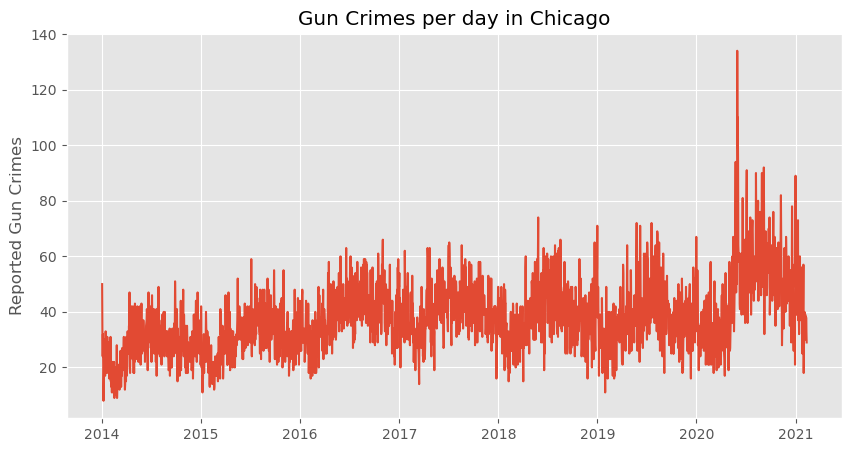

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts.index, ts.values)
ax.set_title('Gun Crimes per day in Chicago')
ax.set_ylabel('Reported Gun Crimes');

There seems to be some abnormal activity happening towards the end of our series.

**[sun-times](https://chicago.suntimes.com/crime/2020/6/8/21281998/chicago-deadliest-day-violence-murder-history-police-crime)**

## Aside: Deeper Exploration

In [25]:
ts.sort_values(ascending=False)[:10]

Date
2020-05-31    134
2020-06-02    110
2020-06-01     99
2020-05-25     94
2020-06-03     94
2020-09-06     92
2020-07-05     91
2020-08-30     90
2020-08-08     90
2021-01-01     89
Name: ID, dtype: int64

Let's treat the span of days from 5-31 to 6-03 as outliers. 

There are several ways to do this, but let's first remove the outliers, and populate an an empty array with the original date range. That will introduce us to the `pandas.date_range()` method.

In [26]:
daily_count = ts[ts < 90]
ts_dr = pd.date_range(daily_count.index[0], daily_count.index[-1])
ts_daily = np.empty(shape=len(ts_dr))
ts_daily = pd.Series(ts_daily)
ts_daily = ts_daily.reindex(ts_dr)
ts = ts_daily.fillna(daily_count)

In [27]:
ts

2014-01-01    50.0
2014-01-02    33.0
2014-01-03    24.0
2014-01-04    32.0
2014-01-05    17.0
              ... 
2021-02-07    34.0
2021-02-08    30.0
2021-02-09    38.0
2021-02-10    34.0
2021-02-11    29.0
Freq: D, Length: 2599, dtype: float64

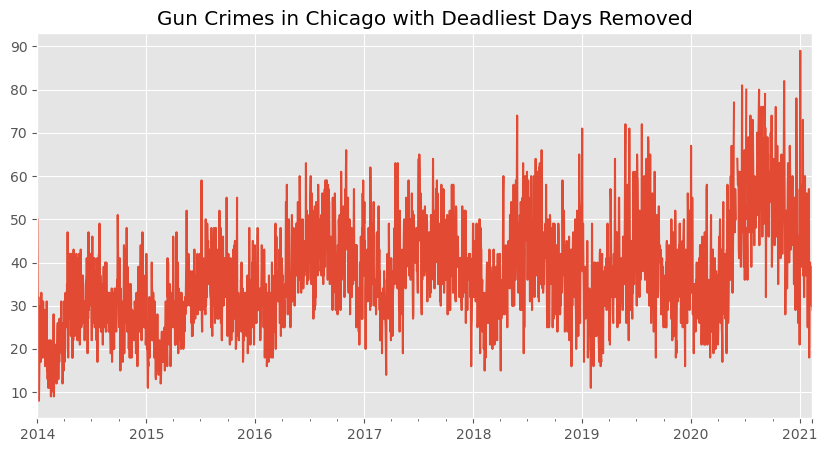

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
ts.plot(ax=ax)
ax.set_title('Gun Crimes in Chicago with Deadliest Days Removed');

Let's zoom in on that week again:

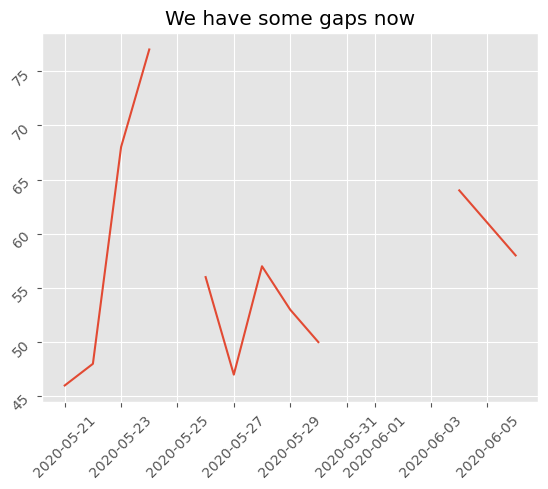

In [29]:
fig, ax = plt.subplots()
ax.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax.tick_params(rotation=45)
ax.set_title('We have some gaps now');

The datetime object allows us several options of how to fill those gaps:

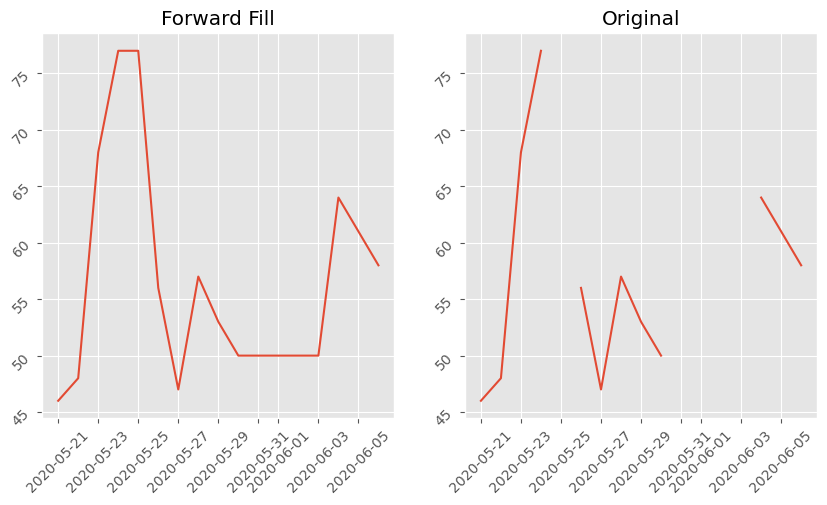

In [30]:
# .ffill()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(ts.ffill()[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax1.tick_params(rotation=45)
ax1.set_title('Forward Fill')

ax2.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax2.tick_params(rotation=45)
ax2.set_title('Original');

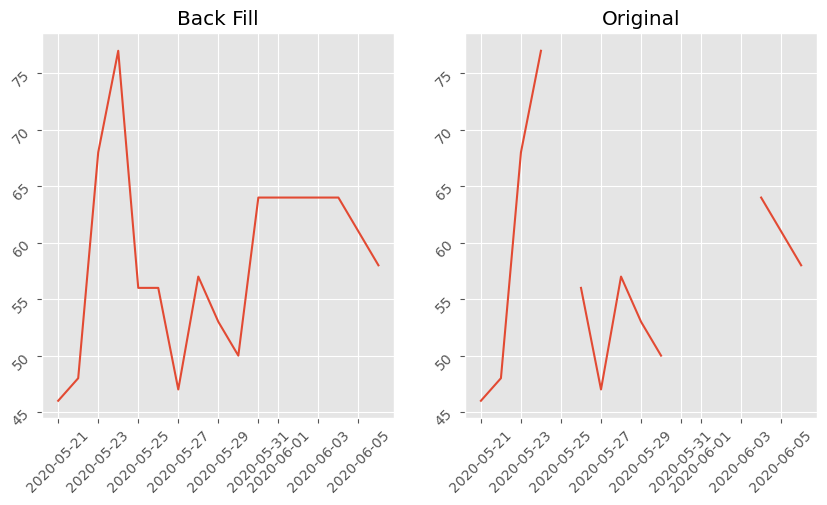

In [31]:
# .bfill()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(ts.bfill()[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax1.tick_params(rotation=45)
ax1.set_title('Back Fill')

ax2.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax2.tick_params(rotation=45)
ax2.set_title('Original');

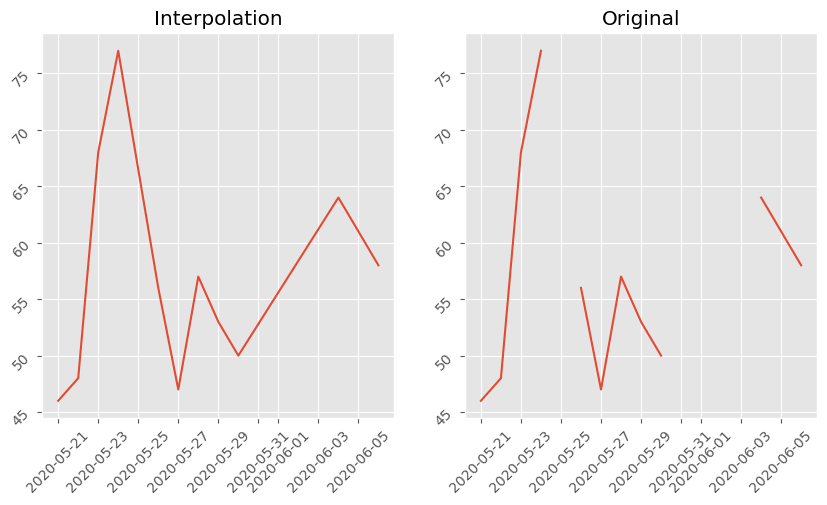

In [32]:
# .interpolate()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(ts.interpolate()[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax1.tick_params(rotation=45)
ax1.set_title('Interpolation')

ax2.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax2.tick_params(rotation=45)
ax2.set_title('Original');

Let's proceed with the interpolated data.

In [33]:
ts = ts.interpolate()
ts.isna().sum()

0

Now that we've cleaned up a few data points, let's downsample to the week level.  

In [34]:
ts_weekly = ts.resample('W').mean()

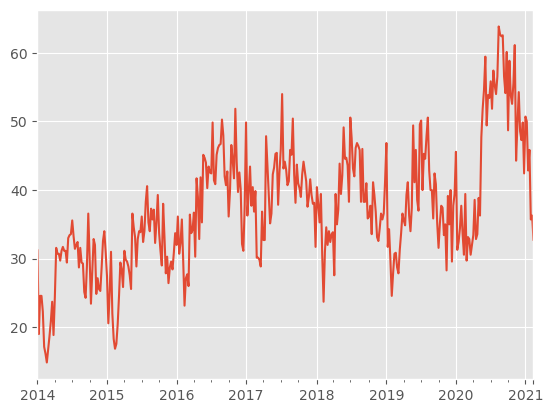

In [35]:
ts_weekly.plot();

# Visualizing Time Series

There can be a lot information to be found in time series! Visualizations can help us tease out this information to something we can more easily observe.

## Showing Changes Over Time

Can identify patterns and trends with visualizations

In [36]:
# New York Stock Exchange average monthly returns [1961-1966] from curriculum
nyse = pd.read_csv("data/NYSE_monthly.csv")
col_name= 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)

In [37]:
display(nyse.head(10))
display(nyse.info())

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042
1961-06-01,-0.042
1961-07-01,0.011
1961-08-01,0.021
1961-09-01,-0.030


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   monthly_return  72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


None

### Line Plot

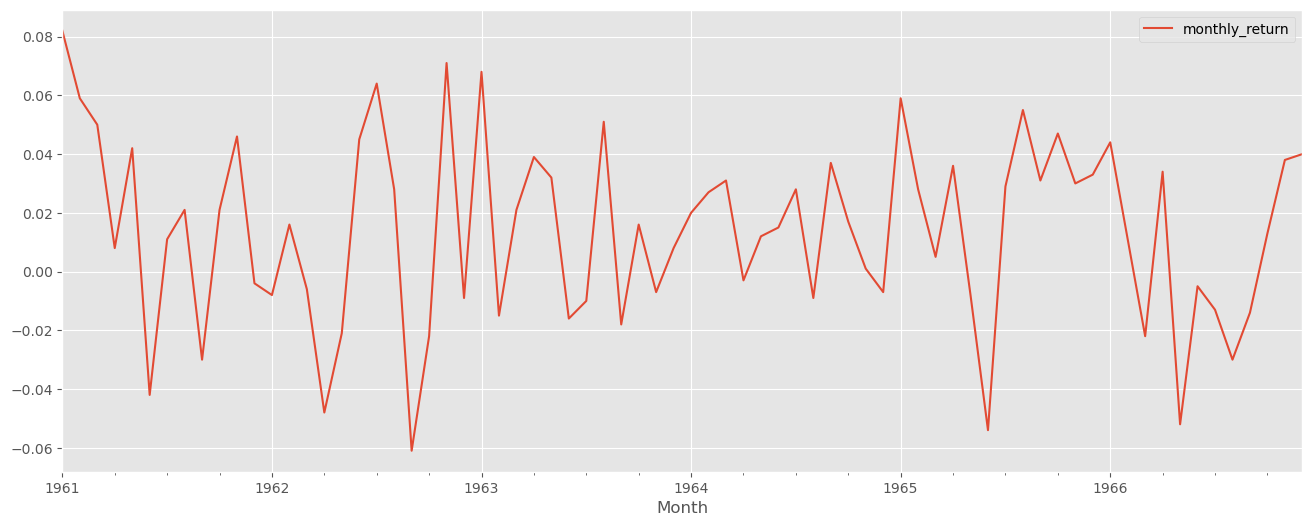

In [38]:
nyse.plot(figsize = (16,6))
plt.show()

### Dot Plot

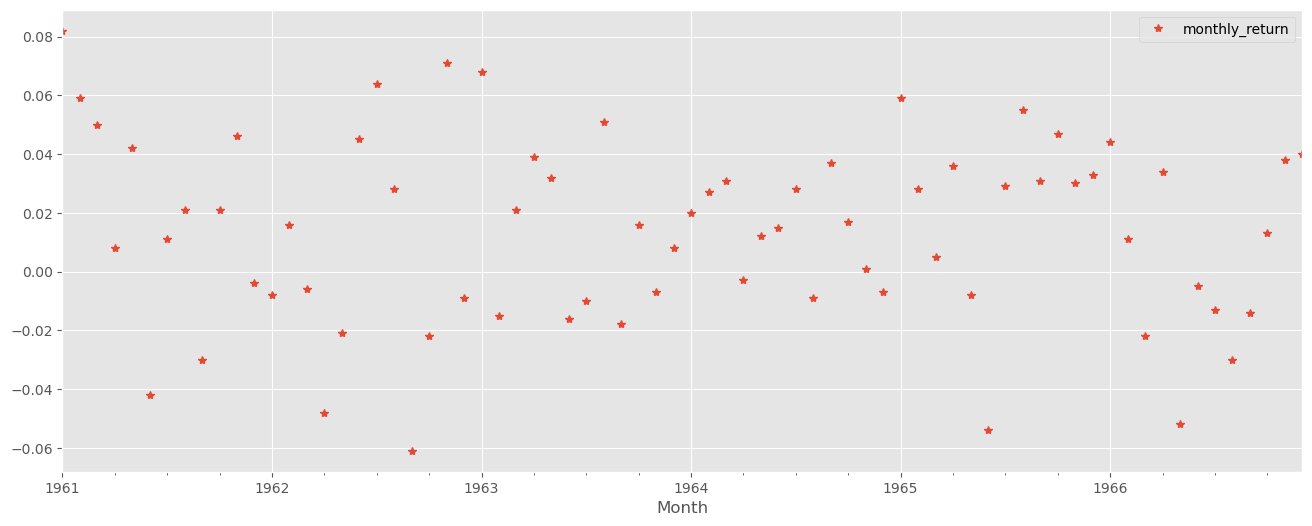

In [39]:
nyse.plot(figsize = (16,6), style="*")
plt.show()

> Note the difference between this and the line plot.
>
> When might you want a dot vs a line plot?

### Grouping Plots

What if we wanted to look at year-to-year (e.g., temperature throughout many years)

There are a couple options to choose from.

#### All Annual Separated

In [40]:
# year_groups == nyse.groupby()
year_groups = nyse.groupby(lambda d: d.year)

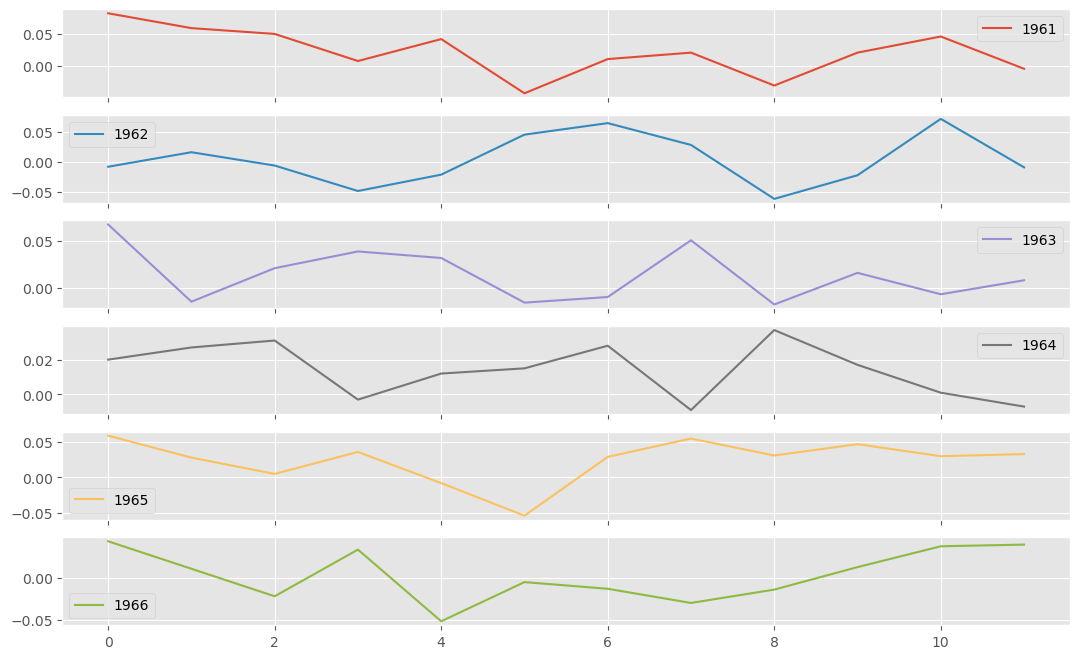

In [41]:
# Annual Frequency
year_groups = nyse.groupby(pd.Grouper(freq ='A'))
# 
#Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
nyse_annual.plot(figsize = (13,8), subplots=True, legend=True)
plt.show()

#### All Annual Together

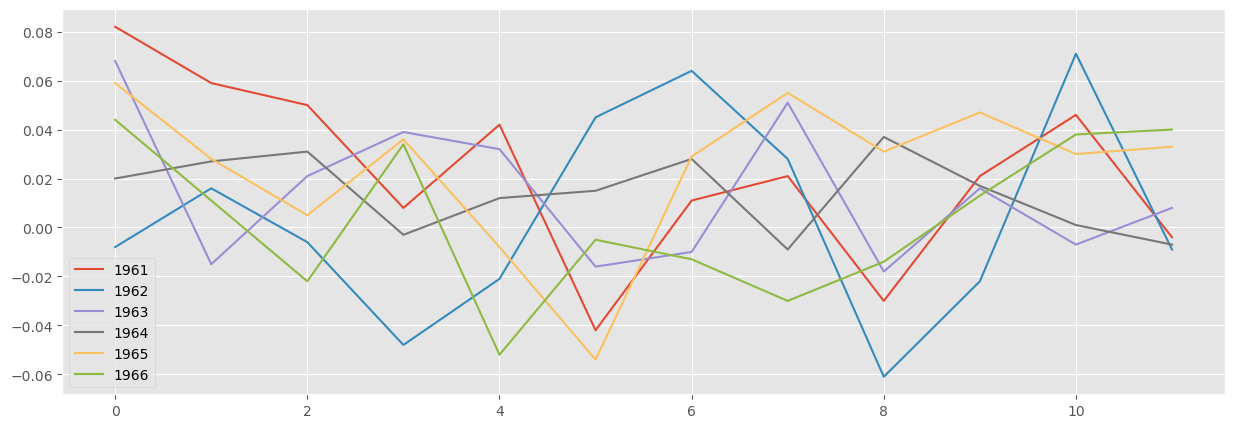

In [42]:
# Plot overlapping yearly groups 
nyse_annual.plot(figsize = (15,5), subplots=False, legend=True)
plt.show()

## Showing Distributions

Sometimes the distribution of the values are important.

What are some reasons?

- Checking for normality (for stat testing)
- First check on raw & transformed data

### Histogram

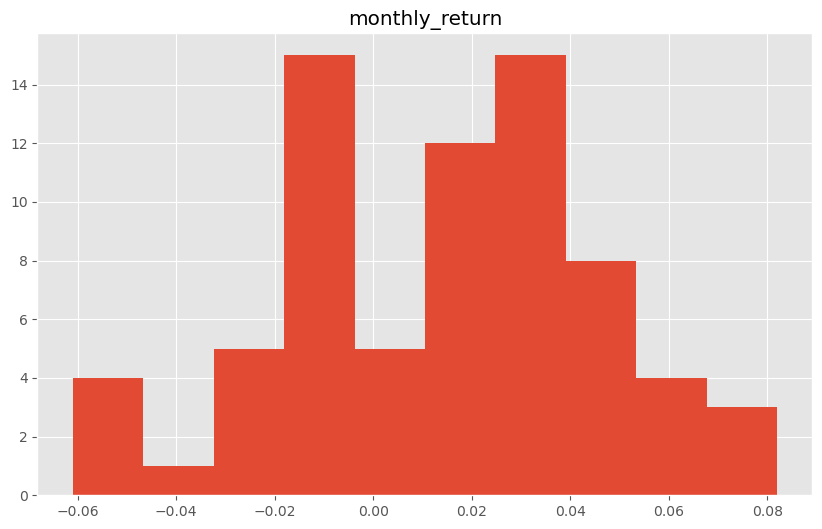

In [43]:
nyse.hist(figsize = (10,6))
plt.show()

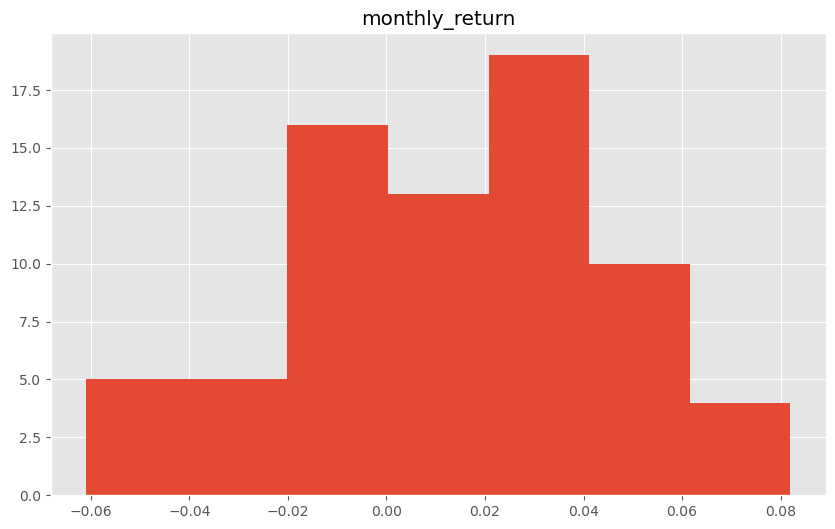

In [44]:
# Bin it to make it more obvious if normal
nyse.hist(figsize = (10,6), bins = 7)
plt.show()

### Density

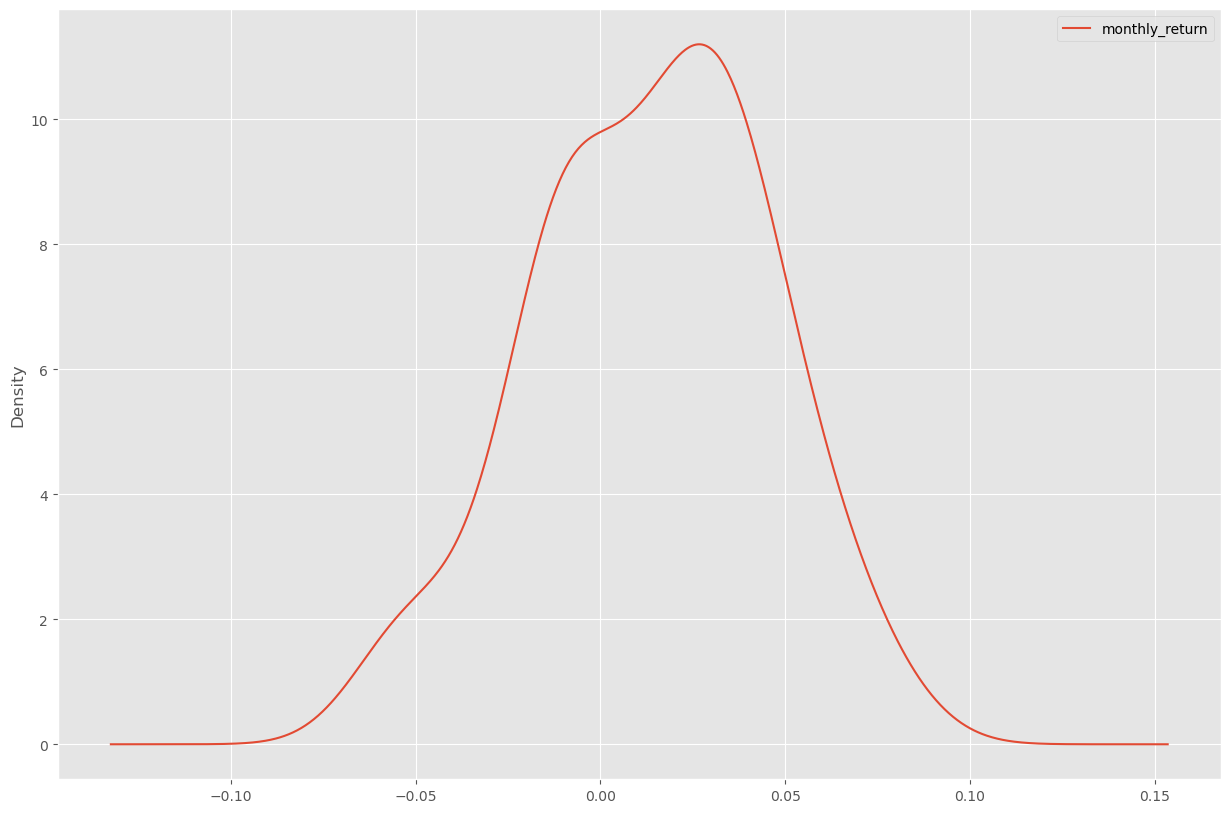

In [45]:
nyse.plot(kind='kde', figsize = (15,10))
plt.show()

### Box Plot

- Shows distribution over time
- Can help show outliers
- Seasonal trends

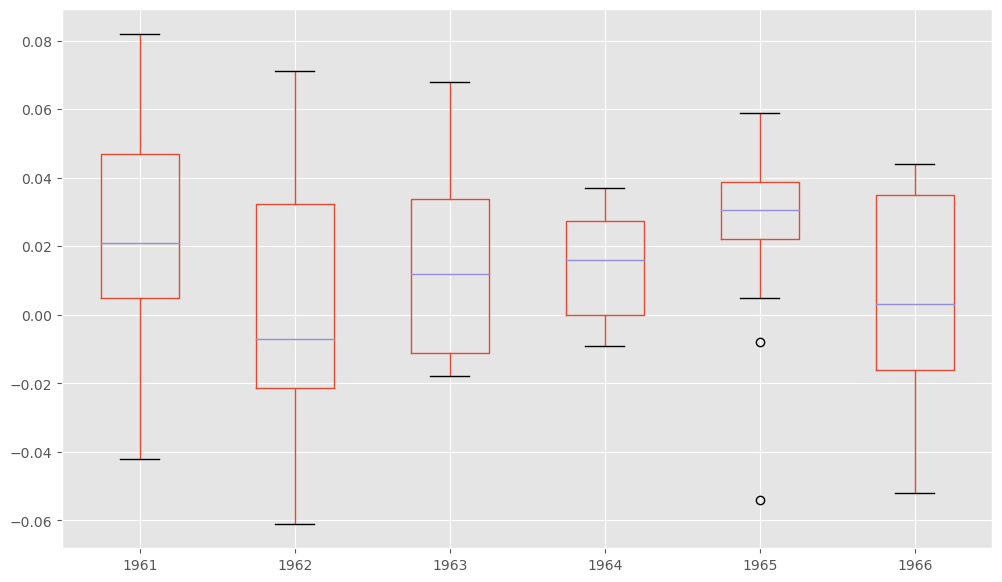

In [46]:
# Generate a box and whiskers plot for temp_annual dataframe
nyse_annual.boxplot(figsize = (12,7))
plt.show()

### Heat Maps

Use color to show patterns throughout a time period for data

#### Example of how heat maps are useful

In [47]:
df_temp = pd.read_csv(
    'data/min_temp.csv',             # Data to read
    index_col=0,                # Use the first column as index ('Date')
    parse_dates=True,           # Have Pandas parse the dates
    infer_datetime_format=True, # Make Pandas try to parse dates automatically
    dayfirst=True               # Impoprtant to know format is DD/MM
)

In [48]:
display(df_temp.head())
display(df_temp.info())

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Daily_min  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


None

In [49]:
# Create a new DataFrame and store yearly values in columns for temperature
temp_annual = pd.DataFrame()

for yr, group in df_temp.groupby(pd.Grouper(freq ='A')):
    temp_annual[yr.year] = group.values.ravel()

##### Plotting each line plot in a subplot

Let's use our strategy in plotting multiple line plots to see if we can see a pattern:

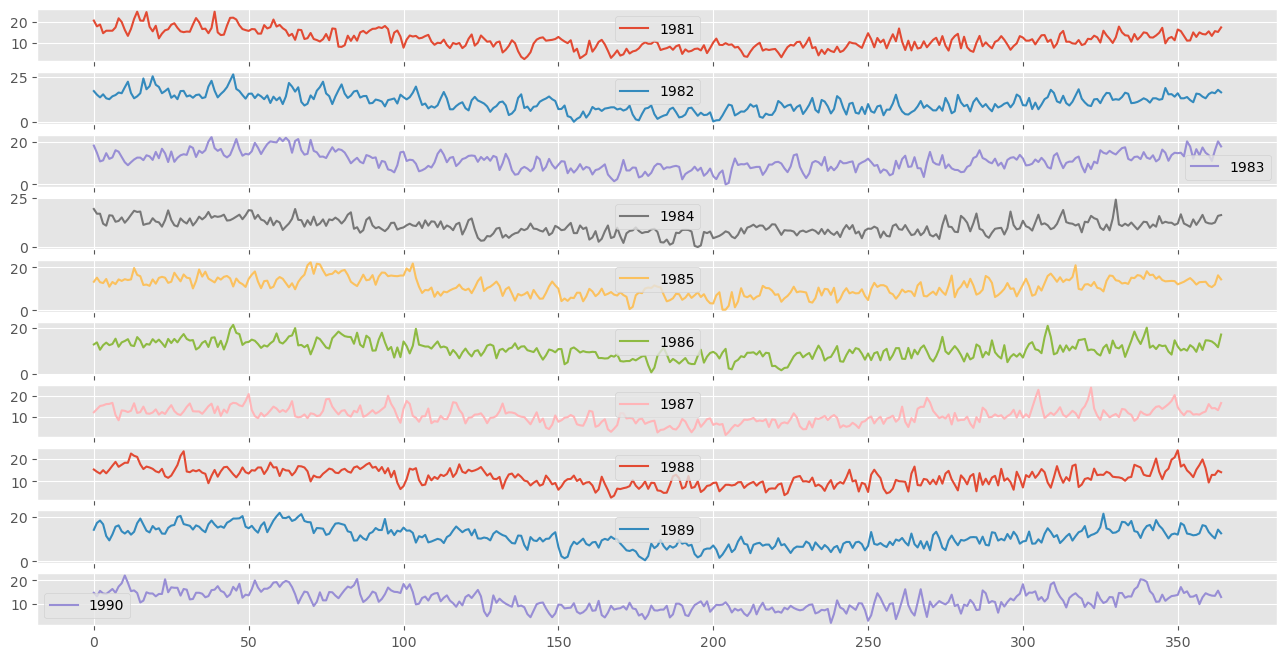

In [50]:
# Plot the yearly groups as subplots
temp_annual.plot(figsize = (16,8), subplots=True, legend=True)
plt.show()

You likely will have a hard time seeing exactly the temperature shift is throughout the year (if it even exists!)

We can try plotting all the lines together to see if a pattern is more obvious in our visual.

##### Plotting all line plots in one plot

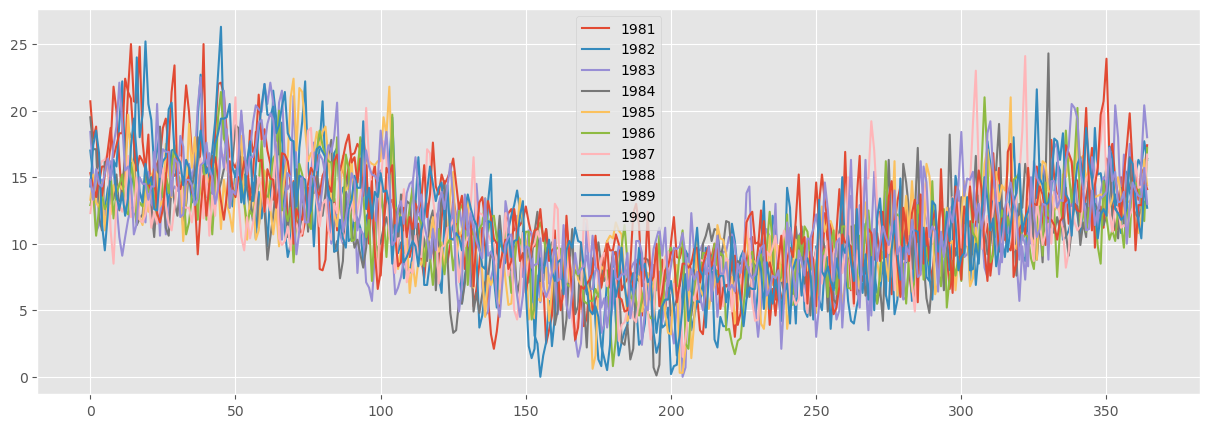

In [51]:
# Plot overlapping yearly groups 
temp_annual.plot(figsize = (15,5), subplots=False, legend=True)
plt.show()

That's great we can see that the temperature decreases in the middle of the data! But now we sacrificed being able to observe any pattern for an individual year. 

This is where using a heat map can help visualize patterns throughout the year for temperature! And of course, the heat map can be used for more than just temperature related data.

##### And finally, using a heat map to visualize a pattern

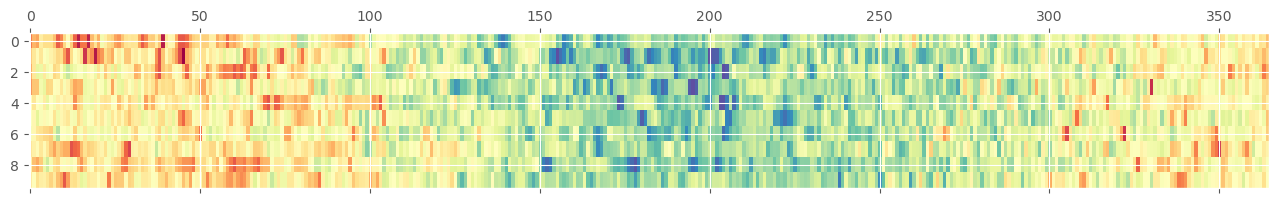

In [52]:
# Year and month 
year_matrix = temp_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

☝🏼 Look at that beautiful visual pattern! Makes me want to weep with joy for all the information density available to us!

# Level Up

## EDA

Let's import some data on **gun violence in Chicago**.

[source](https://data.cityofchicago.org/Public-Safety/Gun-Crimes-Heat-Map/iinq-m3rg)

In [53]:
ts = pd.read_csv('data/Gun_Crimes_Heat_Map.csv')

In [54]:
ts.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,9446834,HX100098,01/01/2014 12:02:00 AM,072XX S MORGAN ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENTIAL YARD (FRONT/BACK),True,False,...,17.0,68,15,1170897.0,1856795.0,2014,02/10/2018 03:50:01 PM,41.762519,-87.649198,"(41.762519013, -87.64919809)"
1,9446765,HX100013,01/01/2014 12:03:00 AM,064XX S ROCKWELL ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),True,False,...,15.0,66,15,1160145.0,1861909.0,2014,02/10/2018 03:50:01 PM,41.776780,-87.688465,"(41.776780469, -87.688465418)"
2,9446921,HX100067,01/01/2014 12:04:00 AM,048XX S PRAIRIE AVE,1460,WEAPONS VIOLATION,POSS FIREARM/AMMO:NO FOID CARD,APARTMENT,True,False,...,3.0,38,15,1178859.0,1872997.0,2014,02/04/2016 06:33:39 AM,41.806801,-87.619523,"(41.806801421, -87.61952336)"
3,9446783,HX100093,01/01/2014 12:05:00 AM,011XX W 50TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,PARKING LOT/GARAGE(NON.RESID.),True,False,...,16.0,61,15,1169689.0,1871646.0,2014,02/10/2018 03:50:01 PM,41.803298,-87.653195,"(41.8032982, -87.653195042)"
4,9446811,HX100017,01/01/2014 12:05:00 AM,031XX W WALNUT ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE PORCH/HALLWAY,True,False,...,27.0,27,15,1155344.0,1901461.0,2014,02/10/2018 03:50:01 PM,41.885414,-87.705005,"(41.885413516, -87.705005317)"


Let's look at some summary stats:

In [55]:
print(f"There are {ts.shape[0]} records in our timeseries")

There are 97437 records in our timeseries


In [56]:
# Definitely some messy input of our Desciption data
ts['Description'].value_counts()

Description
AGGRAVATED: HANDGUN                              26221
ARMED: HANDGUN                                   22691
UNLAWFUL POSS OF HANDGUN                         19121
AGGRAVATED - HANDGUN                              7695
UNLAWFUL POSSESSION - HANDGUN                     5205
RECKLESS FIREARM DISCHARGE                        4377
ARMED - HANDGUN                                   2866
UNLAWFUL USE HANDGUN                              2391
ATTEMPT: ARMED-HANDGUN                            1984
AGGRAVATED: OTHER FIREARM                          668
UNLAWFUL USE - HANDGUN                             623
UNLAWFUL POSS OTHER FIREARM                        611
POSS FIREARM/AMMO:NO FOID CARD                     453
UNLAWFUL USE OTHER FIREARM                         405
ATTEMPT ARMED - HANDGUN                            316
ARMED: OTHER FIREARM                               299
AGGRAVATED PO: HANDGUN                             288
UNLAWFUL USE - OTHER FIREARM                       26

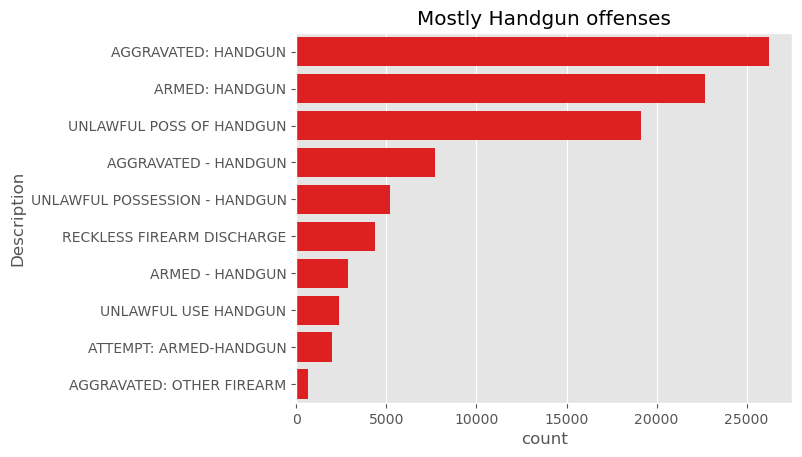

In [57]:
height = ts['Description'].value_counts()[:10]
offense_names = ts['Description'].value_counts()[:10].index

fig, ax = plt.subplots()
sns.barplot(x= height, 
            y = offense_names, 
            color='r', 
            ax=ax)
# sns.barplot(height, offense_names, color='r', ax=ax)
ax.set_title('Mostly Handgun offenses');

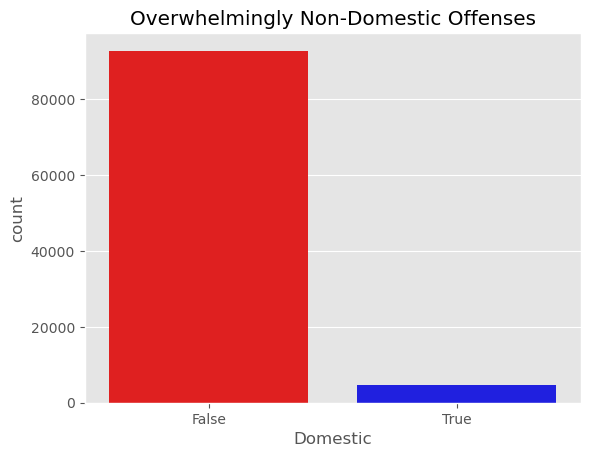

In [58]:
# Mostly non-domestic offenses
value_counts = ts['Domestic'].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=value_counts.index, y=value_counts, palette=['r', 'b'], ax=ax)



ax.set_title("Overwhelmingly Non-Domestic Offenses");

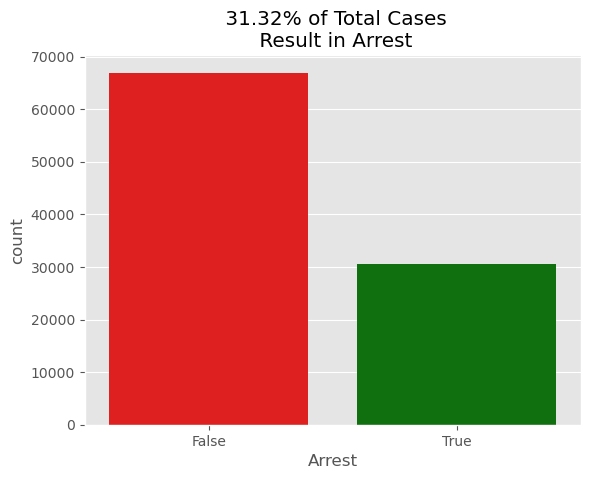

In [59]:
# Mostly non-domestic offenses

arrest_rate = ts['Arrest'].value_counts()[1]/len(ts)

fig, ax = plt.subplots()

sns.barplot( x= ts['Arrest'].value_counts().index, 
             y= ts['Arrest'].value_counts(), 
             palette=['r', 'g'], ax=ax
           )

ax.set_title(f'{arrest_rate: 0.2%} of Total Cases\n Result in Arrest');

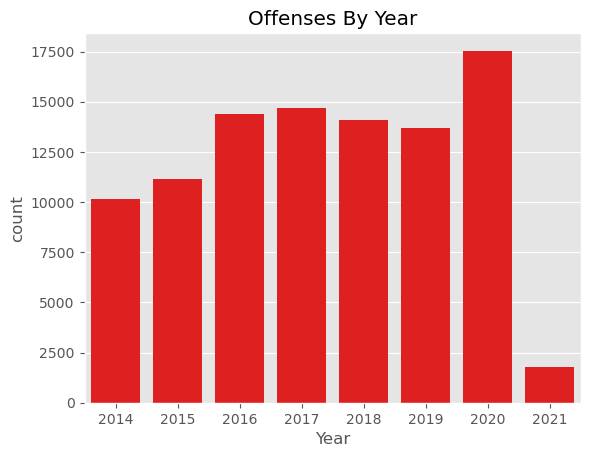

In [60]:
fig, ax = plt.subplots()
sns.barplot( x = ts['Year'].value_counts().index, 
             y = ts['Year'].value_counts(),  
             color= 'r', ax=ax
           )

ax.set_title("Offenses By Year");

While this does show some interesting information that will be relevant to our time series analysis, we are going to get more granular.